<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/Ensemble%20Learning/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset - https://www.kaggle.com/datasets/taweilo/wine-quality-dataset-balanced-classification

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("/content/wine_data.csv")
df.sample(6)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1065,10.9,0.69,0.99,31.8,0.335,192.6,179.1,1.01627,3.08,1.36,10.7,3
11831,6.1,0.34,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
14562,11.1,0.83,0.81,42.8,0.323,149.6,342.1,1.02224,2.86,1.40,11.1,7
2079,13.1,0.61,0.76,48.8,0.252,137.6,350.8,1.02194,3.17,1.55,12.1,3
14766,10.3,0.88,1.07,38.3,0.146,188.4,159.7,1.00976,3.14,1.21,12.1,7
17215,10.1,0.61,0.84,33.8,0.161,165.8,352.4,1.01309,3.26,1.73,13.6,8


In [4]:
df.shape

(21000, 12)

In [5]:
df.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


<Axes: >

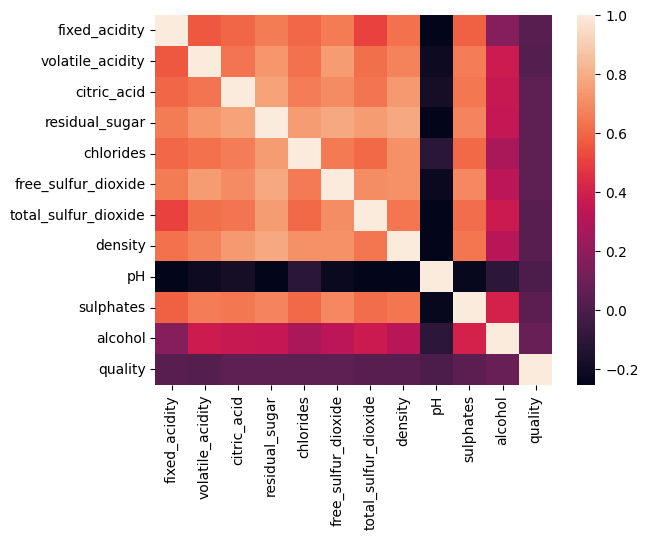

In [7]:
sns.heatmap(df.corr()) # heatmap

In [15]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop(['quality'],axis=1)
y=df['quality']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(16800, 11) (4200, 11)


In [16]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)

print("accuacy -> ",accuracy_score(y_test,y_pred))


accuacy ->  0.5892857142857143


In [18]:
# bagging classifier
bag=BaggingClassifier(
      estimator=DecisionTreeClassifier(),
      n_estimators=800,
      max_samples=0.5,
      bootstrap=True,
      random_state=42
    )

bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)

print("accuacy -> ",accuracy_score(y_test,y_pred))

accuacy ->  0.6164285714285714


In [23]:
# bagging classifier -> pasting
bag=BaggingClassifier(
      estimator=DecisionTreeClassifier(),
      n_estimators=800,
      max_samples=0.5,
      bootstrap=False,
      random_state=42,
      n_jobs=-1
    )

bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)

print("accuacy -> ",accuracy_score(y_test,y_pred))

accuacy ->  0.6192857142857143


In [24]:
# bagging classifier -> Random Subspaces
bag=BaggingClassifier(
      estimator=DecisionTreeClassifier(),
      n_estimators=800,
      max_samples=1.0,
      max_features=0.5,
      bootstrap_features=True,
      random_state=42,
      n_jobs=-1
    )

bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)

print("accuacy -> ",accuracy_score(y_test,y_pred))

accuacy ->  0.6114285714285714


In [25]:
# bagging classifier -> Random Patches
bag=BaggingClassifier(
      estimator=DecisionTreeClassifier(),
      n_estimators=800,
      max_samples=1.0,
      bootstrap=True,
      max_features=0.5,
      bootstrap_features=True,
      random_state=42,
      n_jobs=-1
    )

bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)

print("accuacy -> ",accuracy_score(y_test,y_pred))

accuacy ->  0.6114285714285714


In [27]:
# bagging classifier -> OOB score
bag=BaggingClassifier(
      estimator=DecisionTreeClassifier(),
      n_estimators=800,
      max_samples=0.5,
      bootstrap=True,
      oob_score=True,
      random_state=42
    )

bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)
print("OOB score ->",bag.oob_score_)
print("accuacy -> ",accuracy_score(y_test,y_pred))

OOB score -> 0.6157142857142858
accuacy ->  0.6164285714285714


# To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

In [32]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': [50,100,500,600],
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
}


In [35]:
search=RandomizedSearchCV(estimator=BaggingClassifier(),param_distributions=parameters,cv=5)
search.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
search.best_score_

In [ ]:
search.best_params_

# Regression

In [51]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [52]:
X,y=datasets.make_regression(n_samples=2000,n_features=5,noise=1,bias=0.3)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y , train_size=0.80, test_size=0.20, random_state=123)

In [58]:

lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [59]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.9999565476737551
R^2 score for DT 0.791161452293709
R^2 score for KNN 0.9394710107090315


In [60]:
bag_regressor=BaggingRegressor(random_state=42)
bag_regressor.fit(X_train,Y_train)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.984
Test Coefficient of R^2 : 0.929


In [66]:
params = {'estimator': [None, LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor()],
          'n_estimators': [20,50,80,100],
          'max_samples': [0.5,1.0,0.25],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

search=GridSearchCV(BaggingRegressor(random_state=42,n_jobs=-1),param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [68]:
search.fit(X_train,Y_train)
print('Train R^2 Score : %.3f'%search.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%search.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%search.best_score_)
print('Best Parameters : ',search.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Train R^2 Score : 1.000
Test R^2 Score : 1.000
Best R^2 Score Through Grid Search : 1.000
Best Parameters :  {'bootstrap': True, 'bootstrap_features': False, 'estimator': LinearRegression(), 'max_features': 1.0, 'max_samples': 0.25, 'n_estimators': 50}
